# DSE6000: Final Project: EDA on Job Site

## DSE6000_Fall2019 Final Project
Group 6: Theju Gowda, Mathai Paul, Sarah Hamad and Rajpal Virk

## Introduction
A comprehensive analysis was completed on jobsites with the purpose of gathering information that will give impactful insights to a potential job seeker and to employers as well. However, it is almost impossible to gather and comprehend the information provided from the different jobsites by merely visiting the sites and looking at it. In order to gather information, we applied web scrapping using BeautifulSoup. In this analysis, large amounts of data, approximately 20,000 records, was scraped from different jobsites and a data frame was created. Then the scraped data was cleaned and an extensive analysis was performed. This analysis focused and derived great insights on the following extracted information: job titles, companies seeking for employment, location of job postings, salaries and skill sets required.


## Step 1: Loading & Understanding Dataset
### 1.1 Loading necessary libraries
The necessary libraries were loaded to import the dataset, analyze and visualize it.

In [0]:
#Load required packages.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### 1.2 Loading Dataset
Dataset is imported from google cloud storage bucket and named "Jobsite_df".

In [0]:
#Load the dataset from google bucket.
Jobsite_df= pd.read_excel('https://storage.googleapis.com/job-new/Jobdata1.xlsx')

### 1.3 Reviewing Dataset

In [0]:
# Viewing dataset
Jobsite_df.head()

,Number,Title,Company,City,State,Zip,Country,Salary,MinSalary,MaxSalary,AvgSalary,Rating,Summary,Website,Type of Job,Level of Job
0,1,Data Engineer,Seen by Indeed,NaN,NaN,NaN,USA,0,0,0,0.0,NaN,Get started ‚Äö√Ñ√¨ Complete a 5-minute appli...,Indeed.com,Data Engineer,NaN
1,2,Jr. Machine Learning/Data science,People tech group,NaN,NaN,NaN,USA,0,0,0,0.0,3.8,Machine Learning/ Data Science Engineer*.Work...,Indeed.com,AI/ML,Entry Level
2,3,Senior Data Warehouse Engineer,MileOne Autogroup,NaN,NaN,NaN,USA,0,0,0,0.0,2.8,Must have at least 5 years‚Äö√Ñ√¥ experience ...,Indeed.com,Data Engineer,Senior
3,4,Data Scientist,OneGlobe LLC,NaN,NaN,NaN,USA,0,0,0,0.0,NaN,Analyze system data and creating statistical ...,Indeed.com,Data Scientist,NaN
4,5,Sr. Data Engineer,Gravity Technology Solutions,NaN,NaN,NaN,USA,"$130,000 - $150,000 a year",130000,150000,140000.0,NaN,The data engineer will work directly with pro...,Indeed.com,Data Engineer,Senior


In [0]:
Jobsite_df.shape

(1385, 16)

#### Our dataset has 1385 observations. There is 1 Job Index and 15 different features associated with each indexed job. 


## Step 2: Cleaning dataset
Dataset is initially cleaned using Microsoft Excel. The following steps are taken for additional cleaning of the dataset.

### 2.1 Removing unwanted information.
The "Seen by Indeed" infomration is not useful in this analysis so it is removed.

In [0]:
indexNames = Jobsite_df[ Jobsite_df["Company"] == "Seen by Indeed" ].index
Jobsite_df.drop(indexNames , inplace=True)
Jobsite_df.head()

,Number,Title,Company,City,State,Zip,Country,Salary,MinSalary,MaxSalary,AvgSalary,Rating,Summary,Website,Type of Job,Level of Job
1,2,Jr. Machine Learning/Data science,People tech group,NaN,NaN,NaN,USA,0,0,0,0.0,3.8,Machine Learning/ Data Science Engineer*.Work...,Indeed.com,AI/ML,Entry Level
2,3,Senior Data Warehouse Engineer,MileOne Autogroup,NaN,NaN,NaN,USA,0,0,0,0.0,2.8,Must have at least 5 years‚Äö√Ñ√¥ experience ...,Indeed.com,Data Engineer,Senior
3,4,Data Scientist,OneGlobe LLC,NaN,NaN,NaN,USA,0,0,0,0.0,NaN,Analyze system data and creating statistical ...,Indeed.com,Data Scientist,NaN
4,5,Sr. Data Engineer,Gravity Technology Solutions,NaN,NaN,NaN,USA,"$130,000 - $150,000 a year",130000,150000,140000.0,NaN,The data engineer will work directly with pro...,Indeed.com,Data Engineer,Senior
5,6,2020 Artificial Intelligence / Machine Learnin...,Miso,NaN,NaN,NaN,USA,0,0,0,0.0,3.6,You‚Äö√Ñ√¥ll have a manager and mentor with t...,Indeed.com,AI/ML,Intern


### 2.2 Cleaning column names
We removed spaces from column names and changed column names to lower case. 

In [0]:
#Changing column heads with no spaces and lower case.
Jobsite_df.columns = Jobsite_df.columns.str.replace(' ','')
Jobsite_df.columns = Jobsite_df.columns.str.lower()
Jobsite_df.columns

Index(['number', 'title', 'company', 'city', 'state', 'zip', 'country',
       'salary', 'minsalary', 'maxsalary', 'avgsalary', 'rating', 'summary',
       'website', 'typeofjob', 'levelofjob'],
      dtype='object')

### 2.3 Removing special characters and spaces from summary data.
We removed unwanted characters such as line break, slashes, symbols etc. from summary column for easier execution of codes and extraction of words. 

In [0]:
#Removing unwanted characters.
Jobsite_df.summary = Jobsite_df.summary.str.replace("\n", " ")
Jobsite_df.summary = Jobsite_df.summary.str.replace("/", " " )
Jobsite_df.summary = Jobsite_df.summary.str.replace("Äö√Ñ√¥s"," ")

Jobsite_df.summary.value_counts()

#Change summary to lower case.
Jobsite_df.summary = Jobsite_df.summary.str.lower()

Jobsite_df.summary.value_counts()

skillssql tableau 401(k) data warehouse ssrs benefitspaid time off 401(k) matchingwho we are:  freedom financial network is a family of companies that takes a people-first approach to financial services, using technology to empower consumers to overcome debt and create a brighter financial future. the company was founded in 2002 by brad stroh and andrew housser on the belief that by staying committed to helping people, you can ensure better financial outcomes for both the customer and the business. this heart + $ philosophy still guides the vision of our growing company, which has helped millions of people find solutions for their financial needs.    what began with 2 people in a spare bedroom has now rapidly expanded to a vibrant business that employs over 2,200 employees (known internally as the freedom family) in two locations: san mateo, ca and tempe, az. when you visit either of our offices, you’ll understand why our employees have voted us the best place to work for the last seve

### 2.4 Removing NaN values from summary data

In [0]:

#Removing "NaN" and irregular symbols again from column and checking to see if it worked.
Jobsite_df.dropna(axis=0, subset=['summary'], inplace=True)
Jobsite_df.summary = Jobsite_df.summary.str.replace("Äö√Ñ√",'None')
Jobsite_df.summary = Jobsite_df.summary.str.replace("¥",'None')
Jobsite_df.summary = Jobsite_df.summary.str.replace("google cloud",'googlecloud')

Jobsite_df.summary

1        machine learning  data science engineer*.work...
2        must have at least 5 years‚äö√ñ√None experien...
3        analyze system data and creating statistical ...
4        the data engineer will work directly with pro...
5        you‚äö√ñ√Nonell have a manager and mentor wit...
                              ...                        
1244       job title:                    data scientis...
1245    reporting to our director of marketing analyti...
1246     education  master's degree    job description...
1247    overviewcome join intuit as a senior data scie...
1248    description descriptionjob description:job des...
Name: summary, Length: 1240, dtype: object

### 2.5 Creating new columns.
In this stage, we have extracted keywords of skillsets from the summary in the dataframe and put the count of each skillset in a separate column. 

In [0]:
#If the summary contains word "python", save that python string in new column

Jobsite_df["python"] = np.nan
Jobsite_df["pandas"] = np.nan
Jobsite_df["numpy"] = np.nan
Jobsite_df["java"] = np.nan
Jobsite_df["excel"] = np.nan
Jobsite_df["sql"] = np.nan
Jobsite_df["spark"] = np.nan
Jobsite_df["pyspark"] = np.nan
Jobsite_df["hadoop"] = np.nan
Jobsite_df["tableau"] = np.nan
Jobsite_df["powerbi"] = np.nan
Jobsite_df["azure"] = np.nan
Jobsite_df["aws"] = np.nan
Jobsite_df["googlecloud"] = np.nan

Jobsite_df.loc[Jobsite_df["summary"].str.contains("python"), "python"] = "python"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("pandas"), "pandas"] = "pandas"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("numpy"), "numpy"] = "numpy"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("java"), "java"] = "java"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("excel"), "excel"] = "excel"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("sql"), "sql"] = "sql"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("spark"), "spark"] = "spark"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("pyspark"), "pyspark"] = "pyspark"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("hadoop"), "hadoop"] ="hadoop"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("tableau"), "tableau"] ="tableau"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("powerbi"), "powerbi"] ="powerbi"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("azure"), "azure"] ="azure"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("aws"), "aws"] ="aws"
Jobsite_df.loc[Jobsite_df["summary"].str.contains("googlecloud"), "googlecloud"] ="googlecloud"

In [0]:
Jobsite_df.head()

,number,title,company,city,state,zip,country,salary,minsalary,maxsalary,avgsalary,rating,summary,website,typeofjob,levelofjob,python,pandas,numpy,java,excel,sql,spark,pyspark,hadoop,tableau,powerbi,azure,aws,googlecloud
1,2,Jr. Machine Learning/Data science,People tech group,NaN,NaN,NaN,USA,0,0,0,0.0,3.8,machine learning data science engineer*.work...,Indeed.com,AI/ML,Entry Level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Senior Data Warehouse Engineer,MileOne Autogroup,NaN,NaN,NaN,USA,0,0,0,0.0,2.8,must have at least 5 years‚äö√ñ√None experien...,Indeed.com,Data Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Data Scientist,OneGlobe LLC,NaN,NaN,NaN,USA,0,0,0,0.0,NaN,analyze system data and creating statistical ...,Indeed.com,Data Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sr. Data Engineer,Gravity Technology Solutions,NaN,NaN,NaN,USA,"$130,000 - $150,000 a year",130000,150000,140000.0,NaN,the data engineer will work directly with pro...,Indeed.com,Data Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2020 Artificial Intelligence / Machine Learnin...,Miso,NaN,NaN,NaN,USA,0,0,0,0.0,3.6,you‚äö√ñ√Nonell have a manager and mentor wit...,Indeed.com,AI/ML,Intern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print(Jobsite_df.python.value_counts())
print(Jobsite_df.pandas.value_counts())
print(Jobsite_df.numpy.value_counts())
print(Jobsite_df.java.value_counts())
print(Jobsite_df.excel.value_counts())
print(Jobsite_df.sql.value_counts())
print(Jobsite_df.spark.value_counts())
print(Jobsite_df.pyspark.value_counts())
print(Jobsite_df.hadoop.value_counts())
print(Jobsite_df.tableau.value_counts())
print(Jobsite_df.powerbi.value_counts())
print(Jobsite_df.azure.value_counts())
print(Jobsite_df.aws.value_counts())
print(Jobsite_df.googlecloud.value_counts())

python    544
Name: python, dtype: int64
pandas    50
Name: pandas, dtype: int64
numpy    42
Name: numpy, dtype: int64
java    188
Name: java, dtype: int64
excel    288
Name: excel, dtype: int64
sql    416
Name: sql, dtype: int64
spark    163
Name: spark, dtype: int64
pyspark    12
Name: pyspark, dtype: int64
hadoop    151
Name: hadoop, dtype: int64
tableau    153
Name: tableau, dtype: int64
powerbi    14
Name: powerbi, dtype: int64
azure    85
Name: azure, dtype: int64
aws    191
Name: aws, dtype: int64
googlecloud    33
Name: googlecloud, dtype: int64


### After adding new featured columns, our dataset has 29 different features.  Further, we were able to get a numerical count of how many times each extracted word found in the summary.

### 2.6 Column name change
In this stage, we have changed the column names for ease of understanding.

In [0]:
Jobsite_df = Jobsite_df.rename(columns={"typeofjob": "jobtitle", "title": "subtitle", "salary":"salary_range", "avgsalary":'salary'})
Jobsite_df.columns

Index(['number', 'subtitle', 'company', 'city', 'state', 'zip', 'country',
       'salary_range', 'minsalary', 'maxsalary', 'salary', 'rating', 'summary',
       'website', 'jobtitle', 'levelofjob', 'python', 'pandas', 'numpy',
       'java', 'excel', 'sql', 'spark', 'pyspark', 'hadoop', 'tableau',
       'powerbi', 'azure', 'aws', 'googlecloud'],
      dtype='object')

## Step 3: Exploratory Data Analysis
In following steps, we will do the exploratory analysis of the data.

### 3.1 What is the total number of unique job postings in final dataset?

In [0]:
print(Jobsite_df.number.count())

1240


### There are total 1240 unique job postings extracted in this dataset.


### 3.2 How many websites are used to fetch the data? Plot the job titles for each website.

In [0]:
print(Jobsite_df.website.value_counts())

Indeed.com         594
SimplyHired.com    575
Monster.com         71
Name: website, dtype: int64


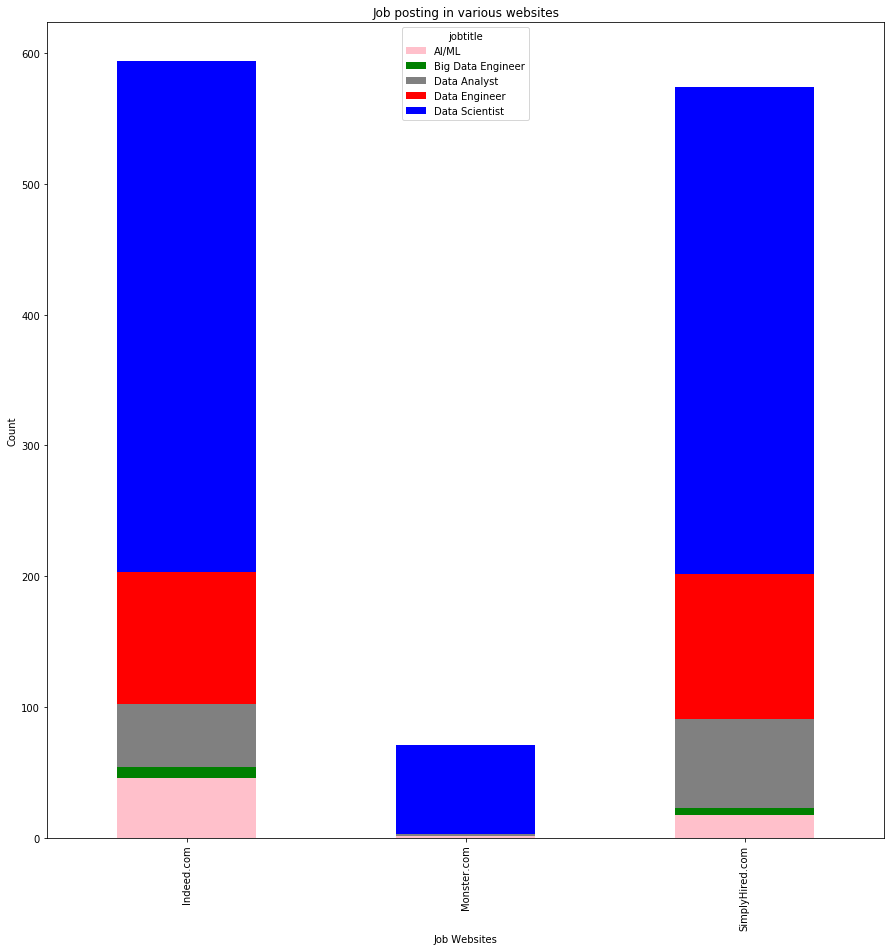

In [0]:
websitejobs = Jobsite_df.groupby(['website','jobtitle']).size().unstack()
websitejobs.plot(kind='bar',stacked='true',color= ('pink','green','grey','red','blue'))
plt.title('Job posting in various websites')
plt.xlabel('Job Websites')
plt.ylabel('Count')
plt.show()

### We have used 3 websites to collect data - 1. Indeed.com; 2. Monster.com; 3. SimplyHired.com

### 3.3 What are the typical job titles posted?

In [0]:
print(Jobsite_df.jobtitle.unique())

['AI/ML' 'Data Engineer' 'Data Scientist' 'Big Data Engineer'
 'Data Analyst' nan]


### 3.4 What is total number of jobs posted for each Job Title and percentage disribution of each job title to total job postings?

In [0]:
print(Jobsite_df.jobtitle.value_counts())

Data Scientist       831
Data Engineer        212
Data Analyst         118
AI/ML                 64
Big Data Engineer     14
Name: jobtitle, dtype: int64


In [0]:
Jobsite_df_df2 = [['Data Scientist',831],['Data Engineer',212], ['Data Analyst',118],['AI/ML',64],['Big Data Engineer',14]]
Jobsite_df_df2 = pd.DataFrame(Jobsite_df_df2, columns = ['JobTitles', 'NumberOfJobs']) 
Jobsite_df_df2 = Jobsite_df_df2.sort_values(by = ['NumberOfJobs'], ascending=False)
Jobsite_df_df2

,JobTitles,NumberOfJobs
0,Data Scientist,831
1,Data Engineer,212
2,Data Analyst,118
3,AI/ML,64
4,Big Data Engineer,14


Text(0.5, 1, 'Job Postings categorised by Job Title(in numbers)')

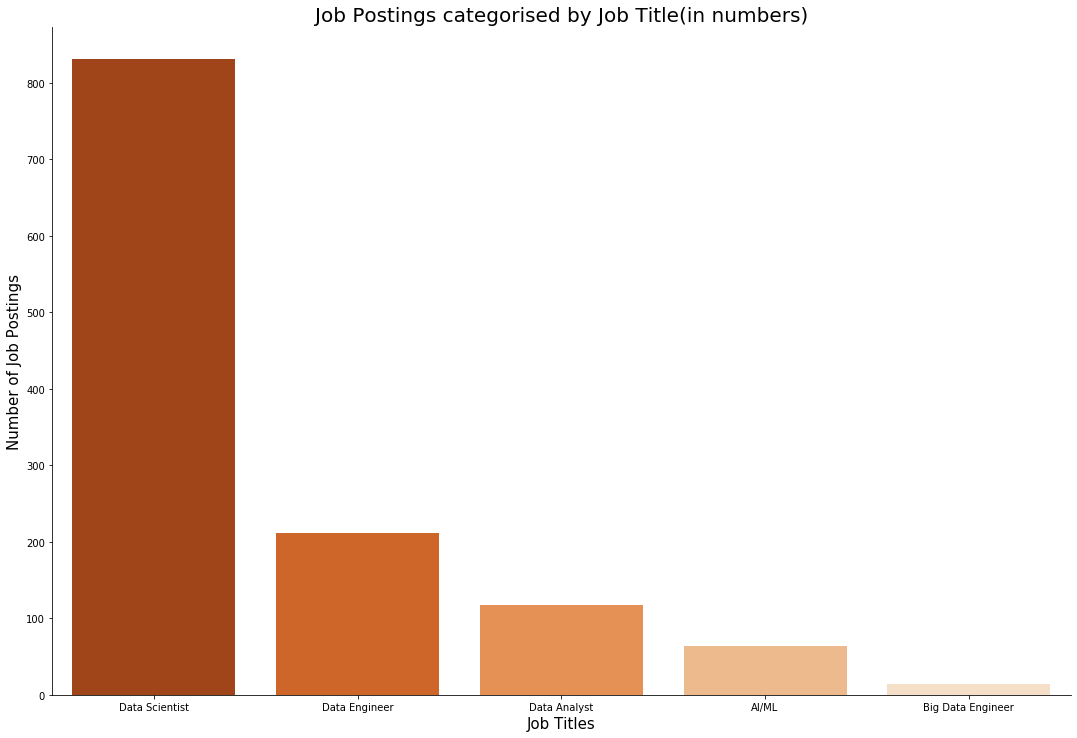

In [0]:
Jobsite_df_df2_barplot=sns.catplot(data=Jobsite_df_df2, x= 'JobTitles', y='NumberOfJobs',kind='bar',palette="Oranges_r", ci=None,legend_out=False,height=10, aspect=1.5)
plt.xlabel('Job Titles',fontsize=15)
plt.ylabel('Number of Job Postings',fontsize=15)
plt.title('Job Postings categorised by Job Title(in numbers)',fontsize=20)

### There are 831 Data Scientist jobs posted followed by 212 Data engineer jobs.

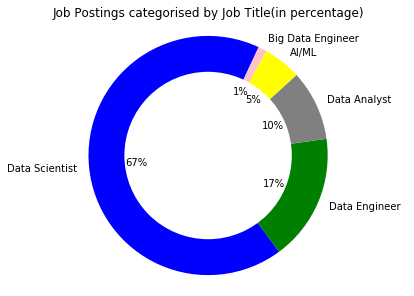

In [0]:

labels = ['Data Scientist','Data Engineer','Data Analyst','AI/ML','Big Data Engineer']
sizes = [831,212,118,64,14]
colors = ['blue','green','grey','yellow','pink']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', startangle=65)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Job Postings categorised by Job Title(in percentage)')
plt.show()

### The highest job title requested is Data Scientist with 831 requests, followed by Data Engineer with 212 requests.

### 3.5 Which top 10 states has the maximum Data Scientist jobs?

Text(0, 0.5, 'Number of Jobs')

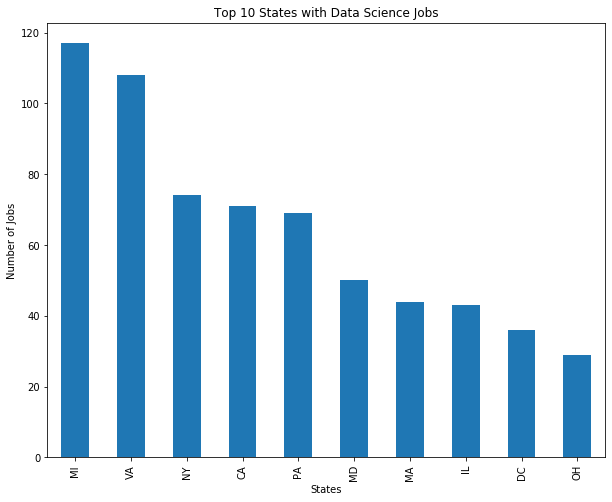

In [0]:
plt.figure(figsize=(10,8))
MaxState = Jobsite_df.groupby('state')['jobtitle'].count().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 States with Data Science Jobs')
plt.xlabel("States")
plt.ylabel("Number of Jobs")

### The state with highest job postings of Data Scientist is Michigan.

### 3.6 What are the typical job subtitles posted?

In [0]:
print(Jobsite_df.subtitle.value_counts())

Data Scientist                                                     281
Data Engineer                                                       54
Data Science Intern                                                 40
Data Scientist                                                      28
Data Scientist - Deloitte (Remote, Freelance/Contract)              24
                                                                  ... 
Junior Data Scientist - NYC                                          1
Multi-Source Intelligence Machine Learning/ Data Scientist 159       1
Data Scientist - Market Research                                     1
Data Engineer/Scientist for Autonomous Driving Data Cloud            1
ORNL Geographic Data Science Post-Master’s Research Associate        1
Name: subtitle, Length: 357, dtype: int64


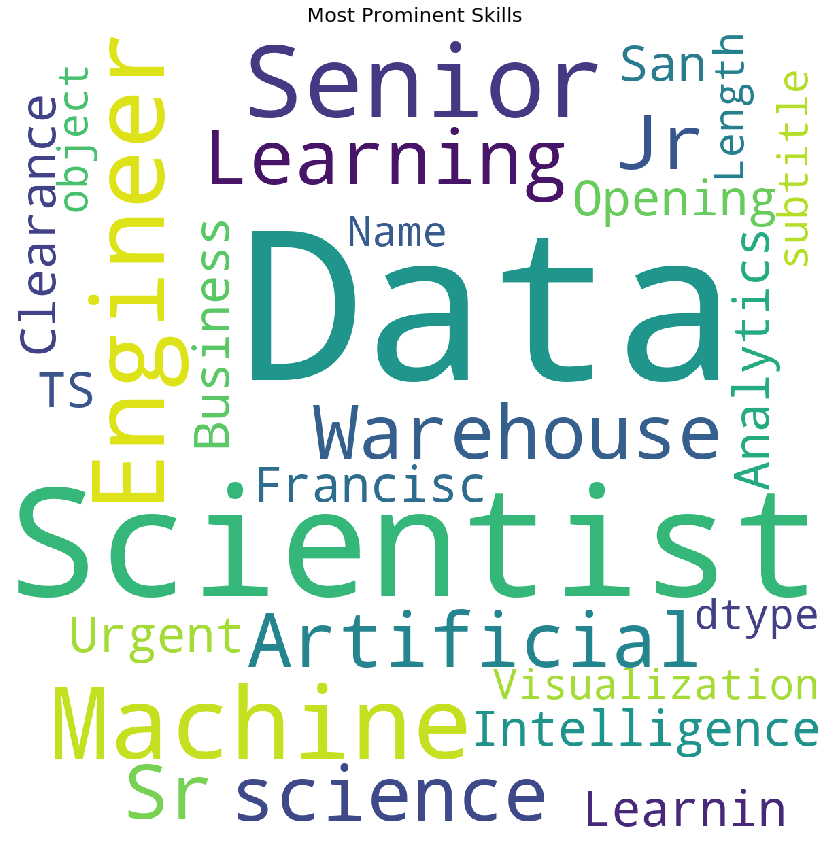

In [0]:

#Most Prominent Skills
from wordcloud import WordCloud
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(Jobsite_df['subtitle']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Prominent Skills',fontsize = 20)
plt.show()


### It is easy to see that Data Scientist is highest subtitle job posted and it can be verified by the count analysis performed in the previous step.

### 3.7 How many states have job postings in this dataset?

In [0]:
len(Jobsite_df['state'].unique().tolist())

40

In [0]:
Jobsite_df.state.unique()

array([nan, 'NY', 'MI', 'NC', 'OR', 'MD', 'VA', 'TX', 'DE', 'IL', 'CA',
       'GA', 'PA', 'AZ', 'OH', 'NJ', 'UT', 'IA', 'MO', 'DC', 'MN', 'IN',
       'WA', 'MA', 'TN', 'SD', 'NE', 'WI', 'FL', 'CO', 'KS', 'NH', 'CT',
       'RI', 'NM', 'KY', 'SC', 'OK', 'ON', 'NV'], dtype=object)

##### There are job postings from 40 different states of the United States.

### 3.8 What is the job distribution based on different states?

In [0]:
print(Jobsite_df.state.value_counts())

MI    117
VA    109
NY     74
CA     71
PA     69
MD     50
MA     44
IL     43
DC     36
OH     29
NC     26
TX     23
GA     21
FL     19
WA     18
IN     16
MO     13
CT     13
IA     12
NJ     10
UT     10
MN     10
AZ      8
CO      8
TN      6
OR      5
NH      3
NM      3
WI      3
RI      2
DE      2
KS      2
SD      1
OK      1
SC      1
NE      1
NV      1
ON      1
KY      1
Name: state, dtype: int64


Text(0.5, 1.0, 'Job Distribution')

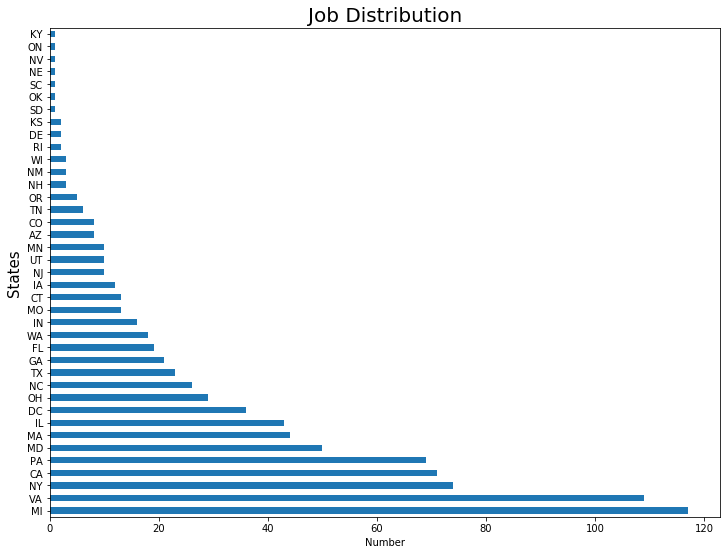

In [0]:
plt.figure(figsize=(12,9))
Jobsite_df['state'].value_counts()[:50].plot(kind='barh')
plt.xlabel('Number')
plt.ylabel('States',fontsize=15)
plt.title('Job Distribution',fontsize=20)

### From the plot above, we can see the distribution of the job postings in the different states.

In [0]:
Jobsite_df_df2 = [['Data Scientist',831],['Data Engineer',212], ['Data Analyst',118],['AI/ML',64],['Big Data Engineer',14]]
Jobsite_df_df2 = pd.DataFrame(Jobsite_df_df2, columns = ['JobTitles', 'NumberOfJobs']) 
Jobsite_df_df2 = Jobsite_df_df2.sort_values(by = ['NumberOfJobs'], ascending=False)
Jobsite_df_df2

,JobTitles,NumberOfJobs
0,Data Scientist,831
1,Data Engineer,212
2,Data Analyst,118
3,AI/ML,64
4,Big Data Engineer,14


### From the above analysis and plot, we can conclude that the state of Michigan has the highest number of jobs (117 jobs) posted compared to the 40 different states.

### 3.9 Which job title has highest posting in Michigan?

In [0]:
michigan = Jobsite_df[Jobsite_df.state == "MI"]
michigan.head()

,number,subtitle,company,city,state,zip,country,salary_range,minsalary,maxsalary,salary,rating,summary,website,jobtitle,levelofjob,python,pandas,numpy,java,excel,sql,spark,pyspark,hadoop,tableau,powerbi,azure,aws,googlecloud
10,11,2020 Summer Internship - Data Science,Domino's,Ann Arbor,MI,48106.0,USA,0,0,0,0.0,3.6,"pursuing ms or mba degree in data science, ma...",Indeed.com,Data Scientist,Intern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Data Scientist,Ford Motor Company,Dearborn,MI,NaN,USA,0,0,0,0.0,4.2,"bachelor‚ degree in statistics, economics, d...",Indeed.com,Data Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16,Data Science Analyst,Blue Cross Blue Shield of Michigan,Detroit,MI,NaN,USA,0,0,0,0.0,3.9,"bachelor‚ degree in business, data science, ...",Indeed.com,Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,17,Information Security Analyst II - Data Science...,Blue Cross Blue Shield of Michigan,Detroit,MI,NaN,USA,0,0,0,0.0,3.9,"gather, organize, and maintain data for repor...",Indeed.com,Data Analyst,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,45,Data Scientist,DTE Energy,Detroit,MI,NaN,USA,0,0,0,0.0,4.0,master‚ or phd degree in data science.knowle...,Indeed.com,Data Scientist,NaN,NaN,NaN,NaN,NaN,NaN,sql,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print(michigan.jobtitle.value_counts())

Data Scientist       86
Data Analyst         17
Data Engineer        12
Big Data Engineer     2
Name: jobtitle, dtype: int64


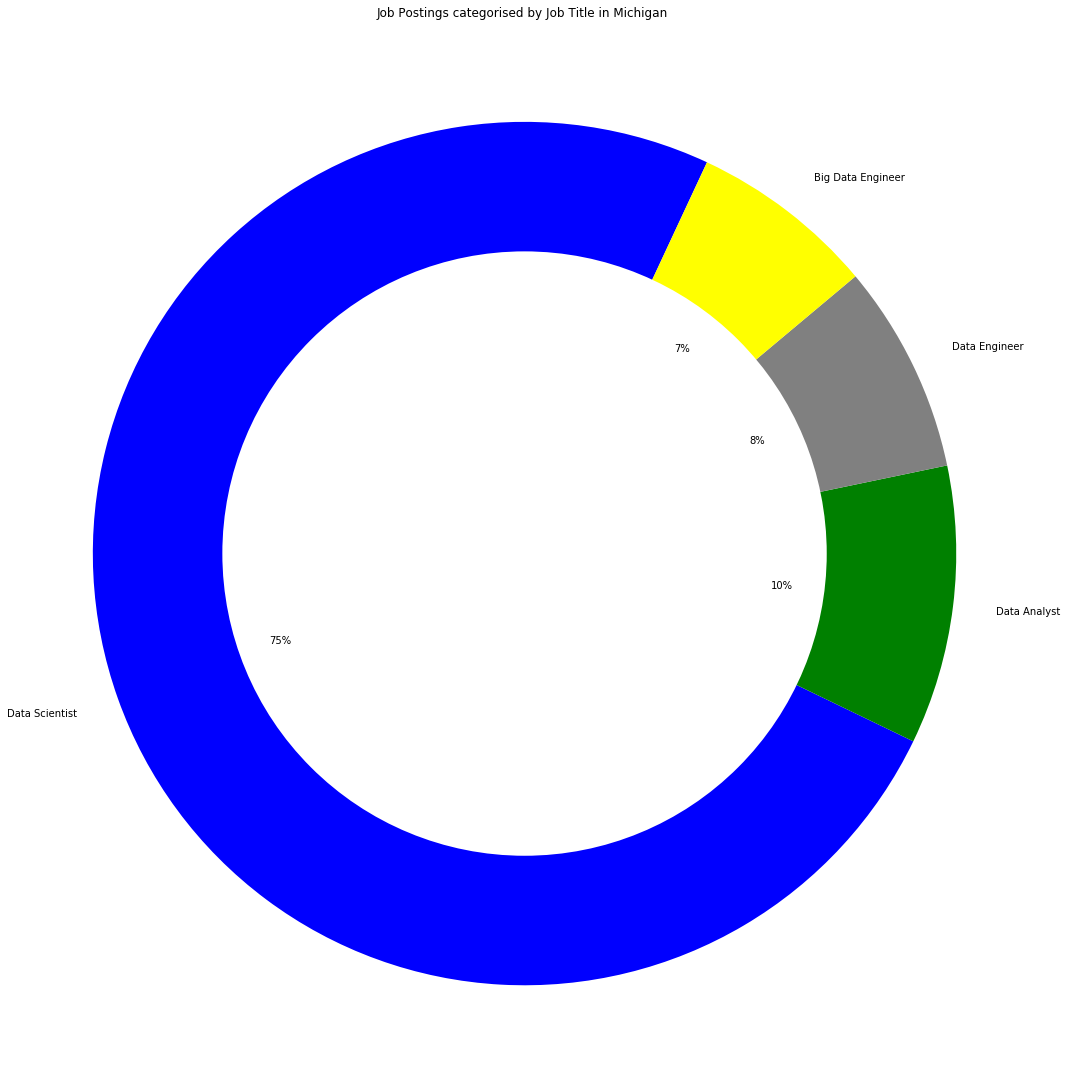

In [0]:
labels = ['Data Scientist','Data Analyst','Data Engineer','Big Data Engineer']
sizes = [86,12,9,8]
colors = ['blue','green','grey','yellow']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', startangle=65)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Job Postings categorised by Job Title in Michigan')
plt.show()

### Data Scientist has the highest number of job posted in the state of Michigan. Around 75% jobs posted are of Data Scientist position.

### 3.10 What is the salary range in Michigan for different job postings?

In [0]:
sal_mich = michigan[(michigan.salary != 0)]
print("Minimum Average Salary", min(sal_mich['salary']))
print("Maximum Average Salary", max(sal_mich['salary']))

Minimum Average Salary 32500.0
Maximum Average Salary 125000.0


Text(0.5, 1.0, 'Boxplot: Salary range in Michigan State')

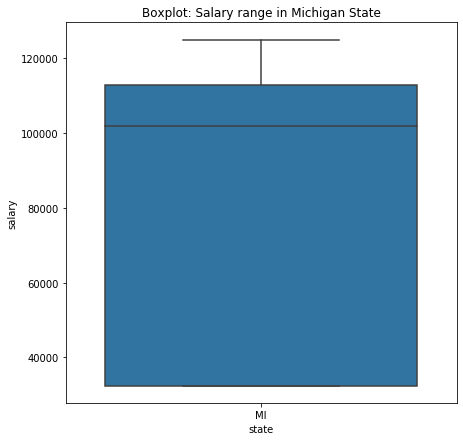

In [0]:
plt.figure(figsize=(7,7))
boxplot_1 = sns.boxplot(x = "state", y="salary", data = sal_mich)
plt.xticks(rotation=0)
plt.title('Boxplot: Salary range in Michigan State')

### Minimum salary in Michigan is 32,500 USD with an average of nearly 100,000 USD. Large proportion of jobs posted offer salaries between minimum and mean salary range.

### 3.11 Which cities in Michigan have jobs posted and what is the count of these jobs in each city?

In [0]:
print(michigan.city.unique())

['Ann Arbor' 'Dearborn' 'Detroit' 'Auburn Hills' 'Southfield'
 'Saint Joseph' 'Grand Rapids']


In [0]:
print(michigan.city.value_counts())

Detroit         43
Dearborn        37
Ann Arbor       19
Auburn Hills    15
Saint Joseph     1
Southfield       1
Grand Rapids     1
Name: city, dtype: int64


In [0]:
Jobsite_df_MI_jobs1 = [['Detroit', 43], ['Dearborn', 37], ['Ann Arbor', 19], ['Auburn Hills',15],['Saint Joseph',1],['Grand Rapids',1],['Southfield',1]]
Jobsite_df_MI_jobs1 = pd.DataFrame(Jobsite_df_MI_jobs1, columns = ['Cities', 'NumberOfJobs']) 
Jobsite_df_MI_jobs1 = Jobsite_df_MI_jobs1.sort_values(by = ['NumberOfJobs'], ascending=False)
Jobsite_df_MI_jobs1

,Cities,NumberOfJobs
0,Detroit,43
1,Dearborn,37
2,Ann Arbor,19
3,Auburn Hills,15
4,Saint Joseph,1
5,Grand Rapids,1
6,Southfield,1


Text(0.5, 1, 'Job Postings in Cities of Michigan')

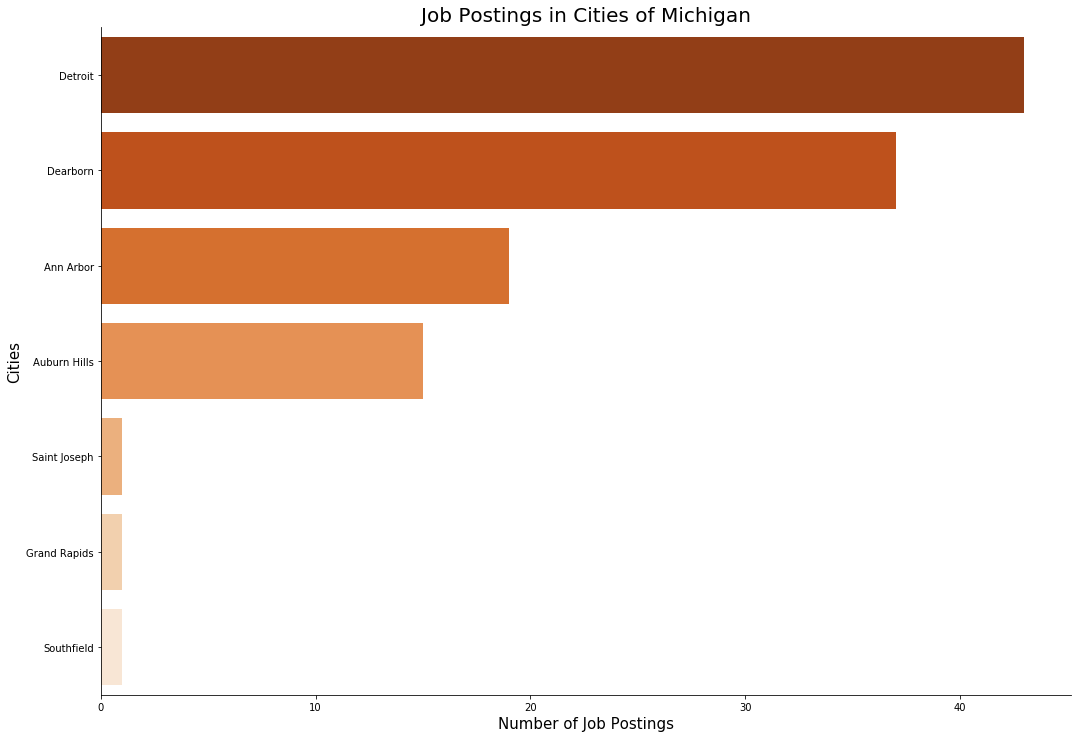

In [0]:
Jobsite_df_MI_jobs1_barplot=sns.catplot(data=Jobsite_df_MI_jobs1, y= 'Cities', x='NumberOfJobs',kind='bar',palette="Oranges_r", ci=None,legend_out=False,height=10, aspect=1.5)
plt.ylabel('Cities',fontsize=15)
plt.xlabel('Number of Job Postings',fontsize=15)
plt.title('Job Postings in Cities of Michigan',fontsize=20)

### From the above analysis and plot, we can see that the cities of Detroit, Dearborn, Ann Arbor, Saint Joseph, Grand Rapids and Southfield are cities that have job postings in Michigan. We can also determine that the highest job postings are from the cities Detroit, Dearborn and Ann Arbor respectively.

### 3.12 Which job title has highest posting in Virginia (state with second highest job postings)?

In [0]:
# 2nd Biggest State for Data Science Jobs
virginia = Jobsite_df[Jobsite_df.state == "VA"]
virginia.head()

,number,subtitle,company,city,state,zip,country,salary_range,minsalary,maxsalary,salary,rating,summary,website,jobtitle,levelofjob,python,pandas,numpy,java,excel,sql,spark,pyspark,hadoop,tableau,powerbi,azure,aws,googlecloud
28,29,"Data Scientist, Senior",UVA Medical Center,Charlottesville,VA,NaN,USA,"$97,302 - $155,667 a year",97302,155667,126484.5,3.7,provides guidance to less experienced data an...,Indeed.com,Data Scientist,Senior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,193,Data Science Director,FAAZ Consulting,Alexandria,VA,NaN,USA,0,0,0,0.0,NaN,improve data collection and presentation capa...,Indeed.com,Data Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,234,Data Science Director,FAAZ Consulting,Alexandria,VA,NaN,USA,0,0,0,0.0,NaN,position title: * data science director.data ...,Indeed.com,Data Scientist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,357,Data Science Director,FAAZ Consulting,Alexandria,VA,NaN,USA,0,0,0,0.0,NaN,improve data collection and presentation capa...,Indeed.com,Data Engineer,NaN,python,NaN,NaN,NaN,NaN,sql,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,416,Data Science Director,FAAZ Consulting,Alexandria,VA,NaN,USA,0,0,0,0.0,NaN,position title: * data science director.data ...,Indeed.com,Data Engineer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print(virginia.jobtitle.value_counts())

Data Scientist       84
Data Analyst          9
Data Engineer         6
AI/ML                 5
Big Data Engineer     4
Name: jobtitle, dtype: int64


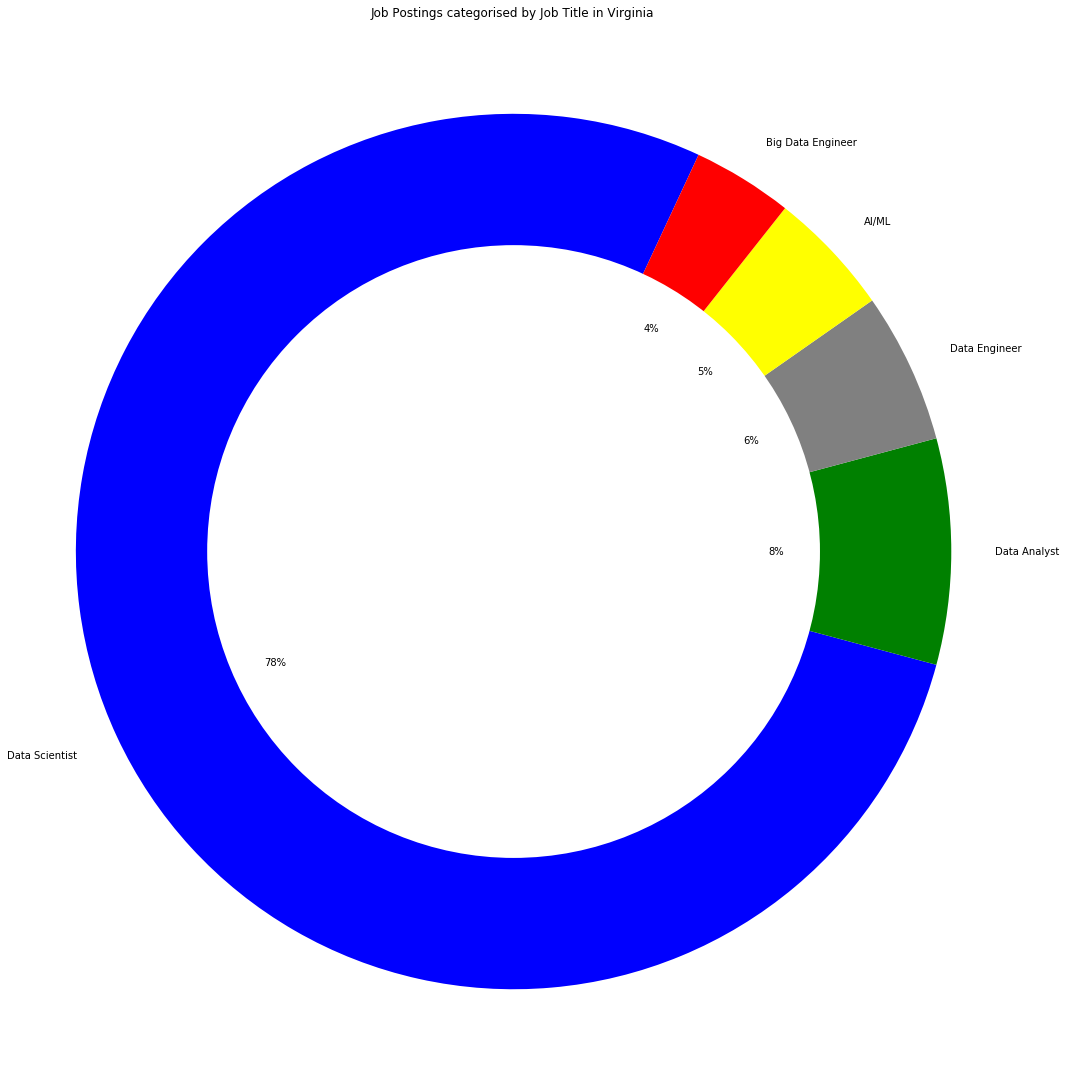

In [0]:
labels = ['Data Scientist','Data Analyst','Data Engineer','AI/ML','Big Data Engineer']
sizes = [84,9,6,5,4]
colors = ['blue','green','grey','yellow','red']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.0f%%', startangle=65)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Job Postings categorised by Job Title in Virginia')
plt.show()

### Data Scientist has the highest number of job posted in the state of Virginia. Around 78% jobs posted are of Data Scientist position.

### 3.13 What is the salary range in Virginia for different job postings?

In [0]:
sal_vir = virginia[(virginia.salary != 0)]
print("Minimum Average Salary", min(sal_vir['salary']))
print("Maximum Average Salary", max(sal_vir['salary']))

Minimum Average Salary 44000.0
Maximum Average Salary 145000.0


Text(0.5, 1.0, 'Boxplot: Salary range in Virginia State')

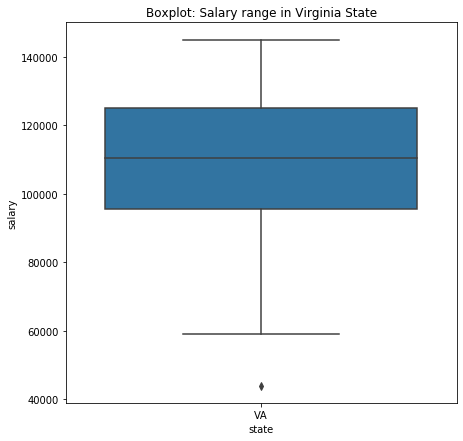

In [0]:
plt.figure(figsize=(7,7))
boxplot_1 = sns.boxplot(x = "state", y="salary", data = sal_vir)
plt.xticks(rotation=0)
plt.title('Boxplot: Salary range in Virginia State')

### Minimum salary in Virginia is 44,000 USD with an average of nearly 145,000 USD. Large proportion of jobs posted offer salaries between 90,000 - 125,000 USD salary range.

### 3.15 Which cities in Virginia have jobs posted and what is the count of these jobs in each city?

In [0]:
print(virginia.city.unique())

['Charlottesville' 'Alexandria' 'Reston' 'McLean' 'Arlington' 'Stafford'
 'Herndon' 'Chantilly' nan 'Dulles' 'Fairfax' 'Sterling' 'Langley'
 'Ashburn' 'Rosslyn' 'Chester' 'Springfield' 'Tysons' 'Vienna' 'Oak Hill'
 'Falls Church']


In [0]:
print(virginia.city.value_counts())

Arlington          29
Alexandria         14
Reston             10
Ashburn             7
Chantilly           7
McLean              6
Herndon             6
Charlottesville     4
Sterling            3
Fairfax             3
Dulles              3
Stafford            2
Springfield         2
Tysons              2
Vienna              2
Langley             2
Oak Hill            1
Falls Church        1
Chester             1
Rosslyn             1
Name: city, dtype: int64


In [0]:
#Top 5 cities of Virginia
Jobsite_df_VI_jobs1 = [['Arlington', 29], ['Alexandria', 14], ['Reston', 10], ['Chantilly',7],['Ashburn',7]]
Jobsite_df_VI_jobs1 = pd.DataFrame(Jobsite_df_VI_jobs1, columns = ['Cities', 'NumberOfJobs']) 
Jobsite_df_VI_jobs1 = Jobsite_df_VI_jobs1.sort_values(by = ['NumberOfJobs'], ascending=False)
Jobsite_df_VI_jobs1

,Cities,NumberOfJobs
0,Arlington,29
1,Alexandria,14
2,Reston,10
3,Chantilly,7
4,Ashburn,7


Text(0.5, 1, 'Job Postings in Cities of Virginia')

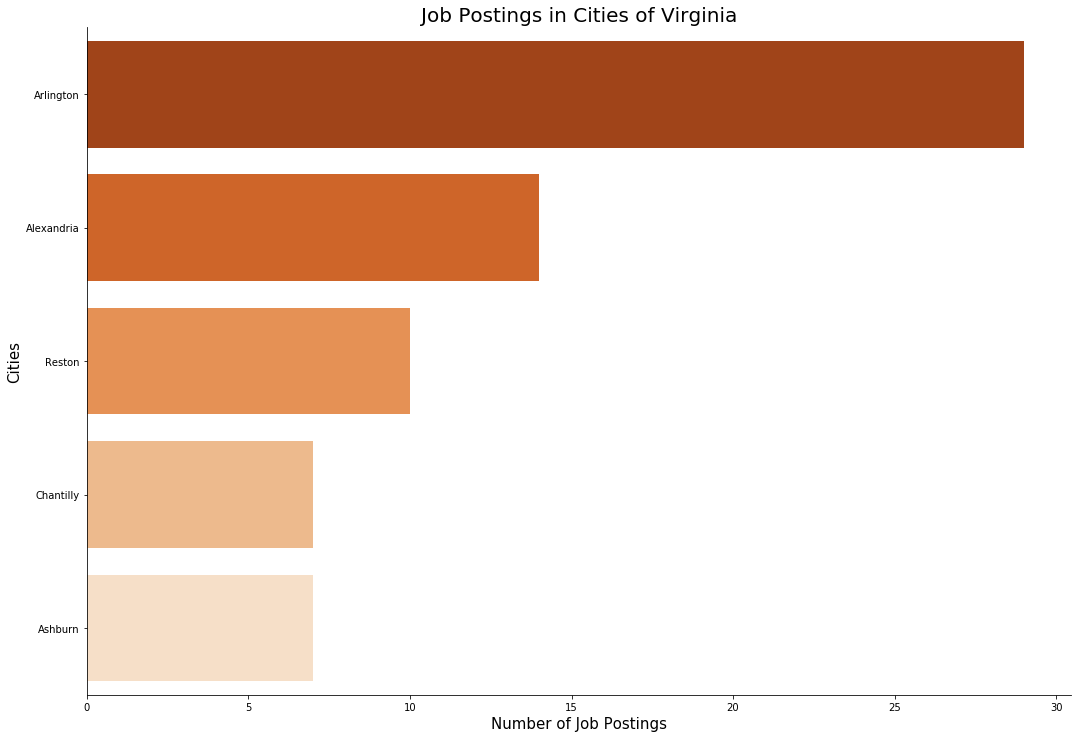

In [0]:
Jobsite_df_VI_jobs1_barplot=sns.catplot(data=Jobsite_df_VI_jobs1, y= 'Cities', x='NumberOfJobs',kind='bar',palette="Oranges_r", ci=None,legend_out=False,height=10, aspect=1.5)
plt.ylabel('Cities',fontsize=15)
plt.xlabel('Number of Job Postings',fontsize=15)
plt.title('Job Postings in Cities of Virginia',fontsize=20)

### From the above analysis and plot, we can see that the city of Arlington, has the highest job postings in Virgnia.

### 3.16 Which job is top highest paying job posted?

In [0]:
Jobsite_df.groupby('jobtitle')['salary'].max()

jobtitle
AI/ML                157500.0
Big Data Engineer    125000.0
Data Analyst         145300.0
Data Engineer        280000.0
Data Scientist       239700.0
Name: salary, dtype: float64

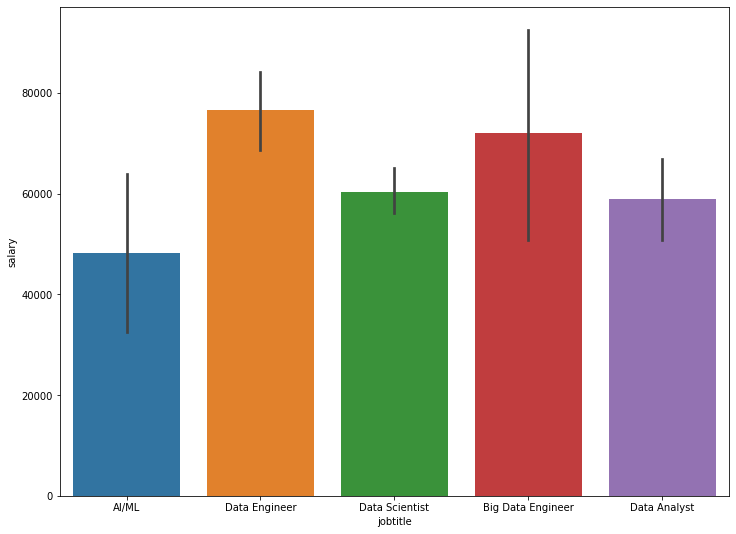

In [0]:
plt.figure(figsize=(12,9))
Q3_bar_plot = sns.barplot(data = Jobsite_df, x='jobtitle', y = 'salary')


### The top 3 paying jobs as per the graph are Data Engineer, followed by Data Scientist and AI/ ML.

In [0]:
### 3.12  Are there any outliers in case of above plot ?

Text(0.5, 1.0, 'Boxplot: Salary range for each Job Title')

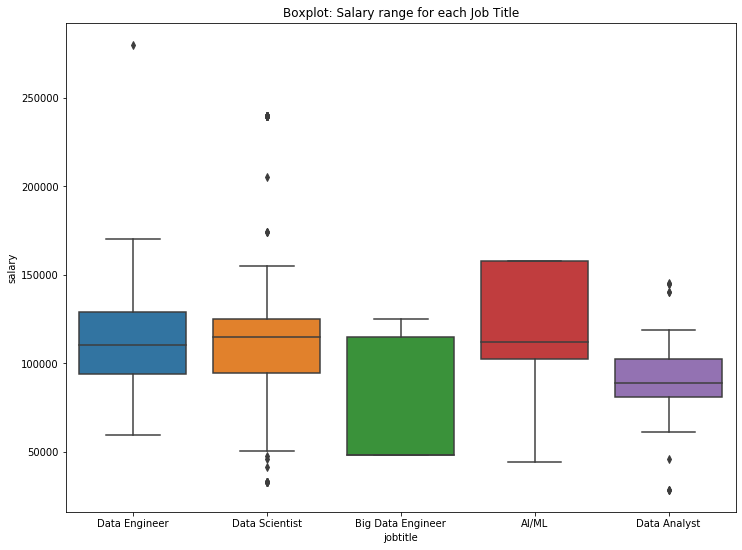

In [0]:
Jobsite_df_salary = Jobsite_df[(Jobsite_df.salary != 0)]
plt.figure(figsize=(12,9))
boxplot_1 = sns.boxplot(x = "jobtitle", y="salary", data = Jobsite_df_salary)
plt.xticks(rotation=0)
plt.title('Boxplot: Salary range for each Job Title')

### Earlier, we have noticed that Data Engineer Salary is highest, however, from above graph we can conlude that based on average salaries, the first highest paying job is ML / AI, followed by Data Scientist and then Data Engineer.

### 3.17 What are the Software key skill categories required?

In [0]:
# initialize list of lists 
skillset_data = [['python', 544], ['pandas', 50], ['numpy', 42], ['java',188],['excel',288],['sql',416], ['spark',163], ['pyspark',12],['hadoop',153],['tableau',153],['powerbi',14]] 
# Create the pandas DataFrame 
skillset_data = pd.DataFrame(skillset_data, columns = ['SkillSet', 'Number']) 
skillset_data = skillset_data.sort_values(by = ['Number'], ascending=False)
# print dataframe. 
skillset_data 


,SkillSet,Number
0,python,544
5,sql,416
4,excel,288
3,java,188
6,spark,163
8,hadoop,153
9,tableau,153
1,pandas,50
2,numpy,42
10,powerbi,14


In [0]:
pip install squarify

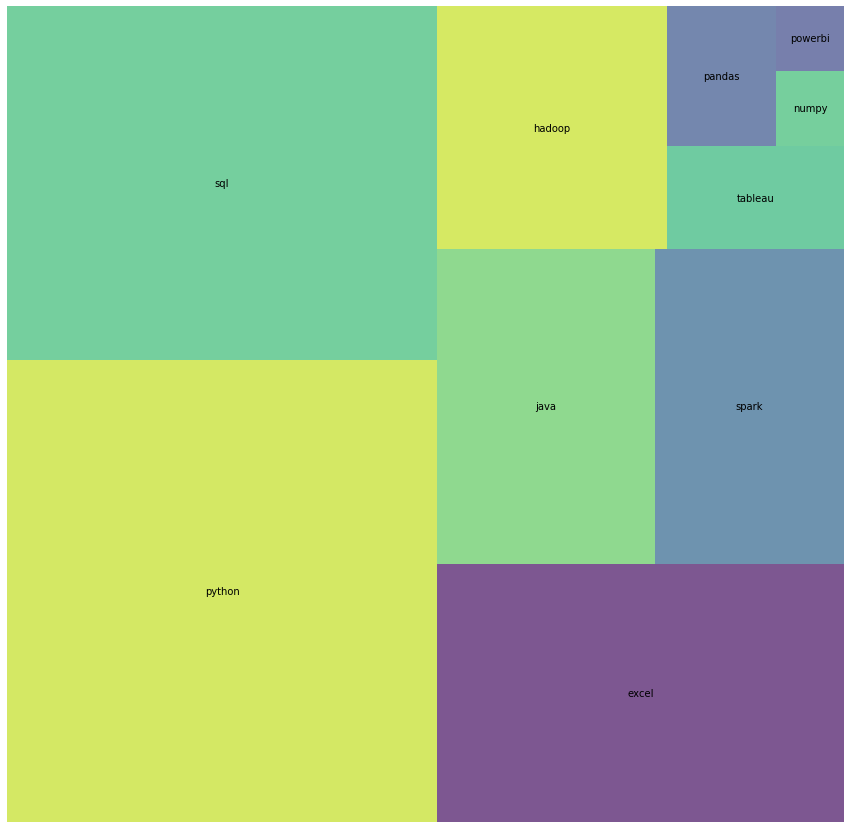

In [0]:
#Tree Map for Skillsets

import squarify   
squarify.plot(sizes= [544,416,288, 188,163,153,50, 42,14,12] , label= ["python" , "sql","excel","java","spark","hadoop","tableau","pandas","numpy","powerbi","pyspark"], alpha=.7 )
plt.axis('off')
plt.show()

Text(0.5, 1, 'Skill Sets')

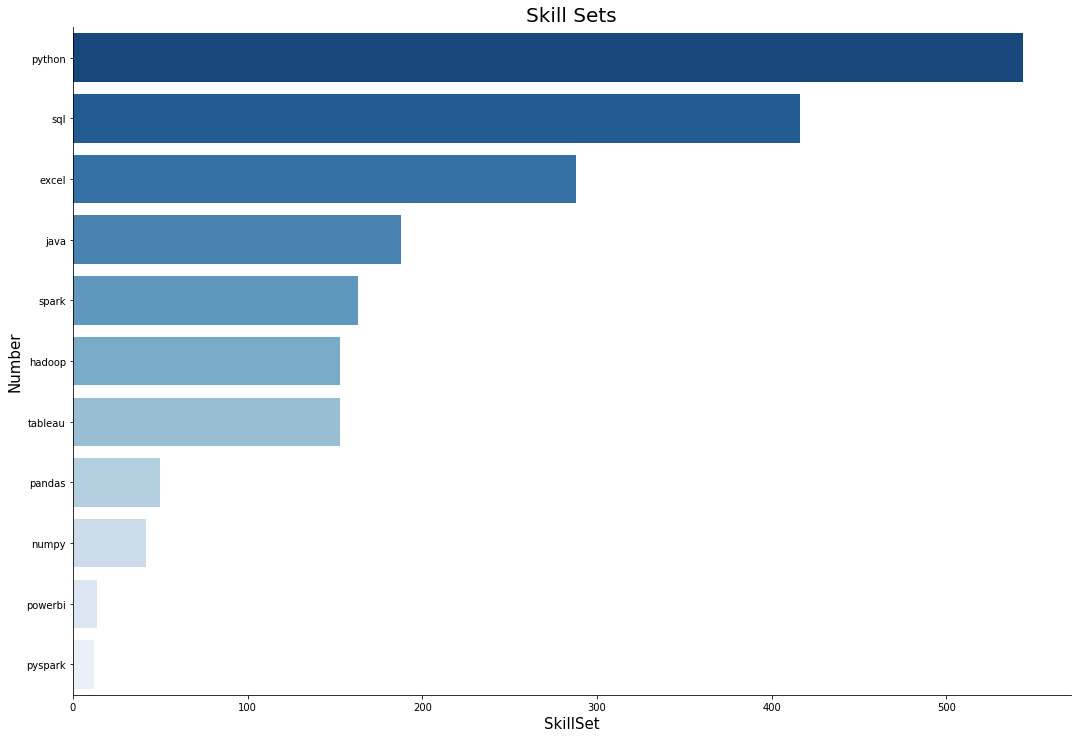

In [0]:
skillset_data_barplot=sns.catplot(data=skillset_data, y= 'SkillSet', x='Number',kind='bar',palette="Blues_r", ci=None,legend_out=False,height=10, aspect=1.5)
plt.xlabel('SkillSet',fontsize=15)
plt.ylabel('Number',fontsize=15)
plt.title('Skill Sets',fontsize=20)

### Based on above graph, we can conclude that Python is the most demanding skill set, followed by SQL and EXCEL.

### 3.18 Which States have highest job posting of Data Scientists job?

select typeofjob,max(maxsalary),min(minsalary),avg(avgsalary) from scrape_data where minsalary > 0 and avgsalary > 0 and maxsalary > 0 group by typeofjob order by max(maxsalary) desc;


select max(maxsalary),min(minsalary),avg(avgsalary) from scrape_data where minsalary > 0 and avgsalary > 0 and maxsalary > 0 order by max(maxsalary) desc;


select state, count(number) from scrape_data where typeofjob = "Data Scientist" group by state order by count(number) desc;


select state, count(number) from scrape_data where typeofjob = "Data Analyst" group by state order by count(number) desc;

select state, min(minsalary), max(maxsalary) from scrape_data where typeofjob = "Data Scientist" and minsalary > 0 and maxsalary > 0 group by state order by max(maxsalary) desc;


select state, min(minsalary), max(maxsalary) from scrape_data where typeofjob = "Data Analyst" and minsalary > 0 and maxsalary > 0 group by state order by max(maxsalary) desc;

In [0]:
ds1= pd.read_csv('https://storage.googleapis.com/csvfds/1.csv')
ds2= pd.read_csv('https://storage.googleapis.com/csvfds/2.csv')
ds3= pd.read_csv('https://storage.googleapis.com/csvfds/3.csv')
ds4= pd.read_csv('https://storage.googleapis.com/csvfds/4.csv')
ds6= pd.read_csv('https://storage.googleapis.com/csvfds/6.csv')
ds7= pd.read_csv('https://storage.googleapis.com/csvfds/7.csv')


In [0]:
#select state, count(number) from scrape_data where typeofjob = "Data Scientist" group by state order by count(number) desc;
ds3.head()

,state,count(number)
0,NaN,201
1,MI,99
2,VA,90
3,CA,70
4,PA,64


In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=ds3['state'], # States
    z = ds3['count(number)'].astype(float), # Data to be color-coded 'count'
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Count of Jobs",
))

fig.update_layout(
    title_text = 'No. of Data Scientist Jobs in States',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

### From above geomap, we can conclude based on the dark coloured map that Michigan have highest job posting of Data Scientist jobs.

### 3.19 Which States have highest job posting of Data Analysts job?

In [0]:
#select state, count(number) from scrape_data where typeofjob = "Data Analyst" group by state order by count(number) desc;
ds4.head()

,state,count
0,NaN,34
1,MI,25
2,VA,11
3,MA,10
4,CA,9


In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=ds4['state'], # States
    z = ds4['count'].astype(float), # Data to be color-coded 'count'
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Count of Jobs",
))

fig.update_layout(
    title_text = 'No. of Data Analysts Jobs in States',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

### From above geomap, we can conclude based on the dark coloured map that Michigan have highest job posting of Data Analysts jobs.

### 3.20 Which State pays highest for Data Scientist job?

In [0]:
#select state, min(minsalary), max(maxsalary) from scrape_data where typeofjob = "Data Scientist" and minsalary > 0 and maxsalary > 0 group by state order by max(maxsalary) desc;
ds6.head()

,state,min(misalary),max(maxsalary)
0,NaN,45775,306000
1,PA,59000,210000
2,OR,48000,200000
3,VA,51000,170000
4,MA,65000,170000


In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=ds6['state'], # States
    z = ds6['max(maxsalary)'].astype(float), # Data to be color-coded 'count'
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Count of Jobs",
))

fig.update_layout(
    geo_scope='usa', # limite map scope to USA
    title_text = 'State paying highest salaries of Data Scientist paid in the United States',
)

fig.show()

### Again from our geomap, it can be concluded that Pennsylvania has current job opening for Data Scientist with highest paying salary.

### 3.21 Which State pays highest for Data Analysts job?

In [0]:
#select state, min(minsalary), max(maxsalary) from scrape_data where typeofjob = "Data Analyst" and minsalary > 0 and maxsalary > 0 group by state order by max(maxsalary) desc;
ds7.head()

,state,min(minsalary),max(maxsalary)
0,NaN,27000,173200
1,MA,70000,170000
2,CA,55000,160000
3,IL,75000,140000
4,OH,92000,130000


In [0]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=ds7['state'], # States
    z = ds7['max(maxsalary)'].astype(float), # Data to be color-coded 'count'
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Count of Jobs",
))

fig.update_layout(
    geo_scope='usa', # limite map scope to USA
    title_text = 'State paying highest salaries of Data Analyst paid in the United States',
)

fig.show()

In [0]:
### Again from our geomap, it can be concluded that Massachusetts has current job opening for Data Analysts with highest paying salary.

### 3.22 Is there a cloud requirement? If yes, which cloud plaforms skill is required comparatively more?

In [0]:
# initialize list of lists for cloud
cloudskillset_data = [['azure', 85], ['aws', 191], ['googlecloud', 33]] 
# Create the pandas DataFrame 
cloudskillset_data = pd.DataFrame(cloudskillset_data, columns = ['SkillSet', 'Number']) 
cloudskillset_data = cloudskillset_data.sort_values(by = ['Number'], ascending=True)
# print dataframe. 
cloudskillset_data 

,SkillSet,Number
2,googlecloud,33
0,azure,85
1,aws,191


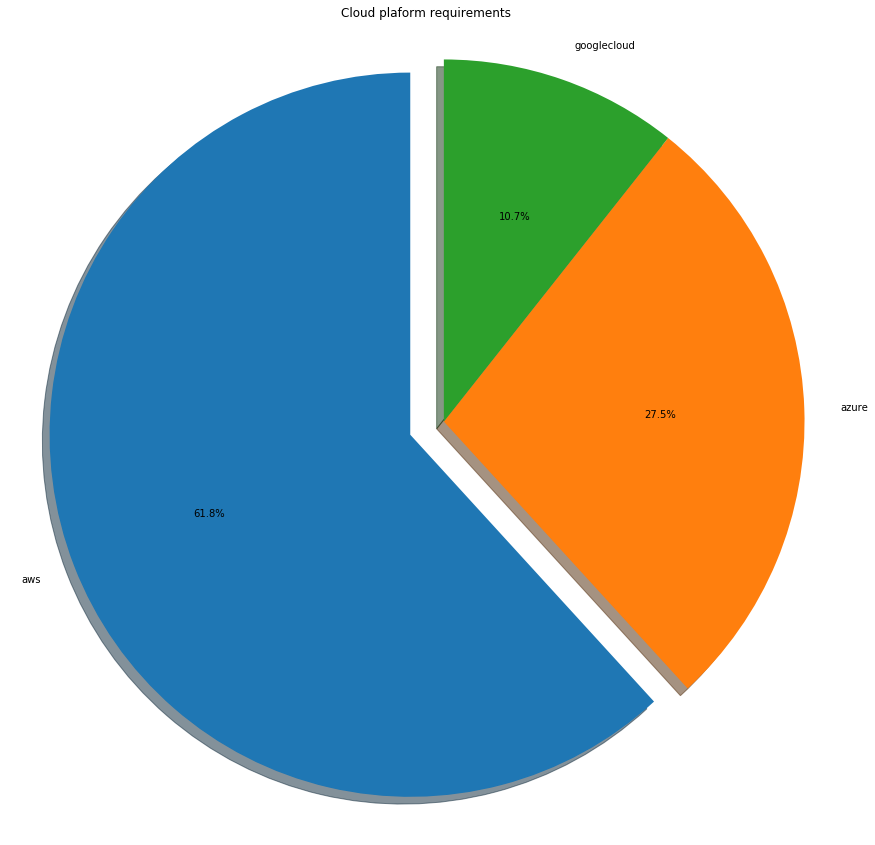

In [0]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'aws', 'azure', 'googlecloud'
sizes = [191, 85, 33]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Cloud plaform requirements')
plt.show()

From analysis, we can conclude that there is definite requirement of cloud skillset. 
### AWS cloud platform skill is asked comparatively more than Azure and Google cloud services.

### CONCLUSION
In conclusion, we were able to successfully scrape the jobsites for significant data.  Equally important, we were able to create a data frame of the scraped data.  A comprehensive analysis was completed on three jobsites - **Monster.com, indeed.com and simplyhired.com, **and impactful insights were derived.
Our cleaned dataset has **1,385 observations**.  We were able to add 29 different features to the original data set after initial examination and quick analyses performed.
**From our analysis, we can conclude that there are a total of 1240 unique job postings extracted in this dataset.**  **The highest jot title requested is the job title of a Data Scientist with 831 requests followed by Data Engineer with 212 requests.**  The highest number of jobs posted are of Data Scientist with total contribution of 62%, followed by Data Engineer with 17% and then by Data Analyst with 10% contribution of the total postings.
**The state with the highest job posting of Data Scientist is Michigan.  However, this result is biased because it is based on location proximity.** We can also conclude that Data Scientist is the highest subtitle jobs posted.
**We determined that there are 40 different states in the United States that have requested Data Scientist or data scientist related jobs.  From the 40 different states, we can conclude that the state of Michigan has the highest number of jobs (117 jobs) posted followed by the states of Virginia and New York, respectively.**

**The job title of Data Scientist has the highest number of jobs posted in the state of Michigan.**  Approximately 75% of the jobs posted are of Data Scientist positions.  **The minimum salary in Michigan is 32,500 US dollars with an average of nearly 100,000 US Dollars.** Large proportion of jobs posted offer salaries between minimum and mean salary range.
**The cities in the state of Michigan that have postings of Data Scientists or related to Data Scientist are Detroit, Dearborn, Ann Arbor, Saint Joseph, Grand Rapids and Southfield. We can also determine that the highest job postings are from the cities Detroit, Dearborn and Ann Arbor; respectively.**

We analysed the state with second highest job posting which is Virginia and observed a similar trend. **The minimum salary of Data Scientist job in Virginia is approximately 42,000 US Dollars, which is higher than the minimum salary of Michigan, approximately 32,000 US Dollars.**

**We can also conclude from our analysis that the top 3 paying jobs are AI/ ML, followed by Data Scientist and Data Engineers.**

